# Requirement
<a href="#1">1.</a> MNIST dataset

<a href="#2">2.</a> Classification model

<a href="#3">3.</a> Changing kernel size

<a href="#4">4.</a> Adding batch normalization



<a name="1">1.</a> MNIST dataset

Use 1/5 training dataset as a validation dataset.

In [2]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.autograd import Variable
import numpy as np

#define transforms
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=trans)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=trans)
print(mnist_testset)

valid_size= 1/5
num_train = len(mnist_trainset)
index_list = list(range(num_train))
split = int(1/5*num_train)

train_idx, valid_idx = index_list[:split], index_list[split:]

valid_set = SubsetRandomSampler(valid_idx)
train_set = SubsetRandomSampler(train_idx)
test_set = mnist_testset

train_loader = DataLoader(mnist_trainset, batch_size=256, sampler=train_set)
valid_loader = DataLoader(mnist_trainset, batch_size=256, sampler=valid_set)
test_loader = DataLoader(mnist_trainset, batch_size=256)

0it [00:00, ?it/s]

9920512it [00:01, 8671642.08it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 130075.02it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 2127385.39it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 48843.91it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


<a name="2">2．</a>Classification model
* Implement CNN model
* Drawing training curve 
* Drawing validation curve

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32,64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        #x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,3*3*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
 
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [4]:
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

optimizer = optim.SGD(model.parameters(), lr=0.05, weight_decay= 1e-6, momentum=0.9)

criterion = nn.CrossEntropyLoss()

train_losses, valid_losses = [], []
train_mean_loss, valid_mean_loss = [], []

for epoch in range(1, 20):
    # training
    model.train()
    for x, target in train_loader:
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, target)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    
    # valuation
    model.eval()
    for data,target in valid_loader:
      out = model(data)
      loss = criterion(out,target)
      valid_losses.append(loss.item())

    train_loss = np.average(train_losses)
    valid_loss = np.average(valid_losses)
    train_mean_loss.append(train_loss)
    valid_mean_loss.append(valid_loss)

    print_msg = (f'epoch: {epoch} ' +
                    f'train_loss: {train_loss:.5f} ' +
                    f'valid_loss: {valid_loss:.5f}')
      
    print(print_msg)

epoch: 1 train_loss: 1.47281 valid_loss: 0.31890
epoch: 2 train_loss: 0.92057 valid_loss: 0.23279
epoch: 3 train_loss: 0.68882 valid_loss: 0.19015
epoch: 4 train_loss: 0.56051 valid_loss: 0.16819
epoch: 5 train_loss: 0.48009 valid_loss: 0.14919
epoch: 6 train_loss: 0.42125 valid_loss: 0.13572
epoch: 7 train_loss: 0.37843 valid_loss: 0.12502
epoch: 8 train_loss: 0.34526 valid_loss: 0.11658
epoch: 9 train_loss: 0.31763 valid_loss: 0.10933
epoch: 10 train_loss: 0.29559 valid_loss: 0.10356
epoch: 11 train_loss: 0.27657 valid_loss: 0.09925
epoch: 12 train_loss: 0.26106 valid_loss: 0.09491
epoch: 13 train_loss: 0.24716 valid_loss: 0.09104
epoch: 14 train_loss: 0.23491 valid_loss: 0.08807
epoch: 15 train_loss: 0.22415 valid_loss: 0.08533
epoch: 16 train_loss: 0.21448 valid_loss: 0.08241
epoch: 17 train_loss: 0.20599 valid_loss: 0.07997
epoch: 18 train_loss: 0.19763 valid_loss: 0.07777
epoch: 19 train_loss: 0.19035 valid_loss: 0.07582


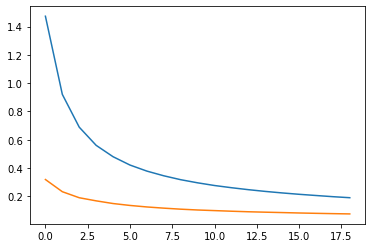

In [5]:
plt.plot(train_mean_loss)
plt.plot(valid_mean_loss)

plt.show()

In [6]:
batch_size = 256
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    if len(target.data) != batch_size:
        break
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.035190

Test Accuracy of     0: 99% (5892/5914)
Test Accuracy of     1: 99% (6708/6733)
Test Accuracy of     2: 99% (5900/5950)
Test Accuracy of     3: 98% (6042/6120)
Test Accuracy of     4: 99% (5780/5833)
Test Accuracy of     5: 98% (5348/5412)
Test Accuracy of     6: 99% (5886/5908)
Test Accuracy of     7: 97% (6124/6256)
Test Accuracy of     8: 98% (5774/5839)
Test Accuracy of     9: 98% (5829/5939)

Test Accuracy (Overall): 98% (59283/59904)


<a name="3">3.</a>Changing kernel size 

Changing the kernel size to 3x3 and 7x7. We have to pay attention to the size of full connected layer. I calculated the size of each convolutional layer and the max pooling, then reshaped the layer size.

# 3x3

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)
epoch: 1 train_loss: 1.69804 valid_loss: 0.49169
epoch: 2 train_loss: 1.05627 valid_loss: 0.32597
epoch: 3 train_loss: 0.78895 valid_loss: 0.25383
epoch: 4 train_loss: 0.63874 valid_loss: 0.21271
epoch: 5 train_loss: 0.54247 valid_loss: 0.18602
epoch: 6 train_loss: 0.47502 valid_loss: 0.16763
epoch: 7 train_loss: 0.42553 valid_loss: 0.15352
epoch: 8 train_loss: 0.38665 valid_loss: 0.14224
epoch: 9 train_loss: 0.35552 valid_loss: 0.13269
epoch: 10 train_loss: 0.32972 valid_loss: 0.12492
epoch: 11 train_loss: 0.30886 valid_loss: 0.11863
epoch: 12 train_loss: 0.29074 valid_loss: 0.11298
epoch: 13 train_loss: 0.27480 valid_loss: 0.10816
epoch: 14 train_loss: 0.26066 valid_loss: 0.10

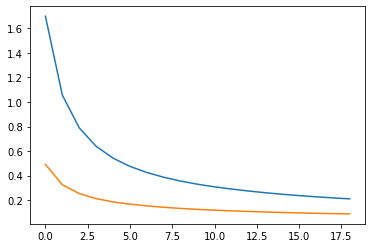

Test Loss: 0.039544

Test Accuracy of     0: 99% (5895/5914)
Test Accuracy of     1: 99% (6698/6733)
Test Accuracy of     2: 98% (5889/5950)
Test Accuracy of     3: 99% (6064/6120)
Test Accuracy of     4: 98% (5725/5833)
Test Accuracy of     5: 97% (5303/5412)
Test Accuracy of     6: 98% (5837/5908)
Test Accuracy of     7: 98% (6162/6256)
Test Accuracy of     8: 98% (5725/5839)
Test Accuracy of     9: 98% (5874/5939)

Test Accuracy (Overall): 98% (59172/59904)


In [7]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3)
        self.conv3 = nn.Conv2d(32,64, kernel_size=3)
        self.fc1 = nn.Linear(5*5*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        #x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,5*5*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
 
model = CNN()
print(model)

import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

optimizer = optim.SGD(model.parameters(), lr=0.05, weight_decay= 1e-6, momentum=0.9)

criterion = nn.CrossEntropyLoss()

train_losses, valid_losses = [], []
train_mean_loss, valid_mean_loss = [], []

for epoch in range(1, 20):
    # training
    model.train()
    for x, target in train_loader:
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, target)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    
    # valuation
    model.eval()
    for data,target in valid_loader:
      out = model(data)
      loss = criterion(out,target)
      valid_losses.append(loss.item())

    train_loss = np.average(train_losses)
    valid_loss = np.average(valid_losses)
    train_mean_loss.append(train_loss)
    valid_mean_loss.append(valid_loss)

    print_msg = (f'epoch: {epoch} ' +
                    f'train_loss: {train_loss:.5f} ' +
                    f'valid_loss: {valid_loss:.5f}')
      
    print(print_msg)

plt.plot(train_mean_loss)
plt.plot(valid_mean_loss)

plt.show()

batch_size = 256

# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    if len(target.data) != batch_size:
        break
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

# 7x7

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(7, 7), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)
epoch: 1 train_loss: 1.67355 valid_loss: 0.49783
epoch: 2 train_loss: 1.10803 valid_loss: 0.33809
epoch: 3 train_loss: 0.84377 valid_loss: 0.26750
epoch: 4 train_loss: 0.69809 valid_loss: 0.22950
epoch: 5 train_loss: 0.60118 valid_loss: 0.20339
epoch: 6 train_loss: 0.53416 valid_loss: 0.18401
epoch: 7 train_loss: 0.48344 valid_loss: 0.16895
epoch: 8 train_loss: 0.44253 valid_loss: 0.15734
epoch: 9 train_loss: 0.40927 valid_loss: 0.14742
epoch: 10 train_loss: 0.38110 valid_loss: 0.13928
epoch: 11 train_loss: 0.35812 valid_loss: 0.13226
epoch: 12 train_loss: 0.33802 valid_loss: 0.12660
epoch: 13 train_loss: 0.32136 valid_loss: 0.12140
epoch: 14 train_loss: 0.30583 valid_loss: 0.1168

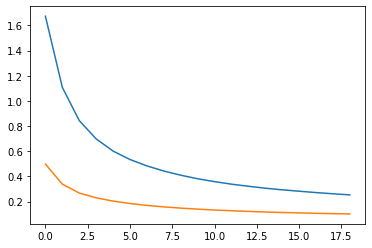

Test Loss: 0.052733

Test Accuracy of     0: 99% (5888/5914)
Test Accuracy of     1: 99% (6714/6733)
Test Accuracy of     2: 98% (5852/5950)
Test Accuracy of     3: 98% (6011/6120)
Test Accuracy of     4: 98% (5740/5833)
Test Accuracy of     5: 98% (5326/5412)
Test Accuracy of     6: 99% (5867/5908)
Test Accuracy of     7: 99% (6204/6256)
Test Accuracy of     8: 98% (5727/5839)
Test Accuracy of     9: 96% (5723/5939)

Test Accuracy (Overall): 98% (59052/59904)


In [8]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=7)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=7)
        self.conv3 = nn.Conv2d(32,64, kernel_size=7)
        self.fc1 = nn.Linear(1*1*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        #x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,1*1*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
 
model = CNN()
print(model)

import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

optimizer = optim.SGD(model.parameters(), lr=0.05, weight_decay= 1e-6, momentum=0.9)

criterion = nn.CrossEntropyLoss()

train_losses, valid_losses = [], []
train_mean_loss, valid_mean_loss = [], []

for epoch in range(1, 20):
    # training
    model.train()
    for x, target in train_loader:
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, target)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    
    # valuation
    model.eval()
    for data,target in valid_loader:
      out = model(data)
      loss = criterion(out,target)
      valid_losses.append(loss.item())

    train_loss = np.average(train_losses)
    valid_loss = np.average(valid_losses)
    train_mean_loss.append(train_loss)
    valid_mean_loss.append(valid_loss)

    print_msg = (f'epoch: {epoch} ' +
                    f'train_loss: {train_loss:.5f} ' +
                    f'valid_loss: {valid_loss:.5f}')
      
    print(print_msg)

plt.plot(train_mean_loss)
plt.plot(valid_mean_loss)

plt.show()

batch_size = 256
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    if len(target.data) != batch_size:
        break
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

<a name="4">4.</a> Adding normalization

I added the batch normalization in the hidden layer after linear function and before the activation layer.

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (norm1): BatchNorm1d(256, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)
epoch: 1 train_loss: 0.91423 valid_loss: 0.16176
epoch: 2 train_loss: 0.57297 valid_loss: 0.13336
epoch: 3 train_loss: 0.43550 valid_loss: 0.11309
epoch: 4 train_loss: 0.35942 valid_loss: 0.10217
epoch: 5 train_loss: 0.31096 valid_loss: 0.09234
epoch: 6 train_loss: 0.27694 valid_loss: 0.08769
epoch: 7 train_loss: 0.25099 valid_loss: 0.08233
epoch: 8 train_loss: 0.23035 valid_loss: 0.07863
epoch: 9 train_loss: 0.21355 valid_loss: 0.07549
epoch: 10 train_loss: 0.19982 valid_loss: 0.07245
epoch: 11 train_loss: 0.18857 valid_loss: 0.06967
epoch: 12 train_loss: 0.17880 valid_loss: 0.06780
epoch

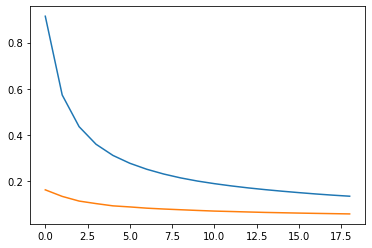

Test Loss: 0.031796

Test Accuracy of     0: 99% (5882/5914)
Test Accuracy of     1: 99% (6706/6733)
Test Accuracy of     2: 98% (5853/5950)
Test Accuracy of     3: 99% (6071/6120)
Test Accuracy of     4: 98% (5760/5833)
Test Accuracy of     5: 98% (5352/5412)
Test Accuracy of     6: 99% (5878/5908)
Test Accuracy of     7: 98% (6183/6256)
Test Accuracy of     8: 99% (5794/5839)
Test Accuracy of     9: 98% (5846/5939)

Test Accuracy (Overall): 99% (59325/59904)


In [10]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32,64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.norm1 = nn.BatchNorm1d(256,momentum=0.5)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        #x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,3*3*64 )
        x = F.relu(self.norm1(self.fc1(x)))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
 
model = CNN()
print(model)

import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

optimizer = optim.SGD(model.parameters(), lr=0.05, weight_decay= 1e-6, momentum=0.9)

criterion = nn.CrossEntropyLoss()

train_losses, valid_losses = [], []
train_mean_loss, valid_mean_loss = [], []

for epoch in range(1, 20):
    # training
    model.train()
    for x, target in train_loader:
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, target)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    
    # valuation
    model.eval()
    for data,target in valid_loader:
      out = model(data)
      loss = criterion(out,target)
      valid_losses.append(loss.item())

    train_loss = np.average(train_losses)
    valid_loss = np.average(valid_losses)
    train_mean_loss.append(train_loss)
    valid_mean_loss.append(valid_loss)

    print_msg = (f'epoch: {epoch} ' +
                    f'train_loss: {train_loss:.5f} ' +
                    f'valid_loss: {valid_loss:.5f}')
      
    print(print_msg)

plt.plot(train_mean_loss)
plt.plot(valid_mean_loss)

plt.show()

batch_size = 256
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    if len(target.data) != batch_size:
        break
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

# Compare performance

We can see that the accuracy in the first model is 98%, after I added the batch normalizaion, the accuracy up to 99%. The performance has been improved.